In [1]:
pwd

'/home/wsuser/work'

In [6]:
!pip install keras==2.2.4
!pip install tensorflow==2.5.0
!pip install matplotlib

In [7]:
#importing the necessary modules
from tensorflow.keras.datasets import mnist
import numpy as np

In [8]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Training data:


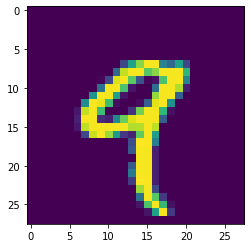

Label of this image is 9


In [9]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [10]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [11]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [12]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [15]:
#importing the model
from tensorflow.keras.models import Sequential

In [16]:
#creating model object
model=Sequential()

2022-11-17 07:33:20.433194: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 07:33:20.433254: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
#importing layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [18]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [19]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

Epoch 1/5
600/600 [==============================] - 118s 197ms/step - loss: 0.1298 - accuracy: 0.9594 - val_loss: 0.0462 - val_accuracy: 0.9853
Epoch 2/5
600/600 [==============================] - 118s 197ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0296 - val_accuracy: 0.9915
Epoch 3/5
600/600 [==============================] - 118s 196ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 4/5
600/600 [==============================] - 121s 201ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0293 - val_accuracy: 0.9904
Epoch 5/5
600/600 [==============================] - 118s 197ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0269 - val_accuracy: 0.9914


In [21]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0269 - accuracy: 0.9914


([0.010324971750378609, 0.996666669845581],
 [0.026886282488703728, 0.9914000034332275])

In [22]:
#testing the model with sample data
my_number = xtest[0]

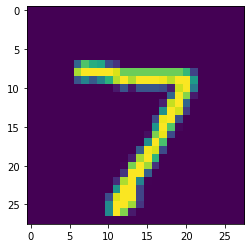

In [23]:
plt.imshow(my_number.reshape(28,28))

In [24]:
model.predict(my_number.reshape(1,28,28,1))

array([[1.5503168e-04, 3.4412038e-01, 1.9301564e-02, 6.1854583e-01,
        1.8241617e-01, 6.6486299e-03, 6.4288906e-07, 1.0000000e+00,
        5.8965087e-03, 1.8038204e-01]], dtype=float32)

In [25]:
predict_x=model.predict(my_number.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)

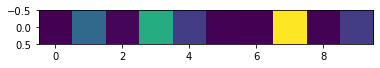

In [26]:
plt.imshow(predict_x)

In [27]:
print(model.metrics_names)
print(model.evaluate(xtest,y_test,verbose=0))

['loss', 'accuracy']
[0.026886282488703728, 0.9914000034332275]


In [28]:
#Saving the model
model.save("CNN_MNIST_v1.h5")

In [29]:
pwd

'/home/wsuser/work'

In [30]:
ls

CNN_MNIST_v1.h5


In [31]:
#loading and testing the trained model
from tensorflow import keras
model = keras.models.load_model('CNN_MNIST_v1.h5')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [38]:
model_test = xtest[2]

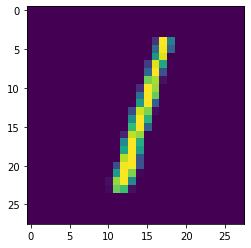

In [39]:
plt.imshow(model_test.reshape(28,28))

In [40]:
model.predict(model_test.reshape(1,28,28,1))

array([[1.1775970e-02, 9.9999726e-01, 3.0519426e-02, 4.6517933e-05,
        4.4140068e-01, 5.2243710e-02, 1.0008693e-01, 1.2824628e-01,
        5.8688343e-02, 4.6363473e-04]], dtype=float32)

In [41]:
predictions=model.predict(model_test.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)

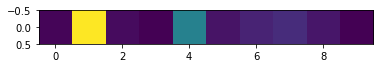

In [42]:
plt.imshow(predictions)

IBM Deployment

In [43]:
!tar -zcvf handwritten-digit-classification-model.tgz CNN_MNIST_v1.h5

CNN_MNIST_v1.h5


In [44]:
ls

CNN_MNIST_v1.h5  handwritten-digit-classification-model.tgz


In [45]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 18.9 MB/s eta 0:00:01


In [55]:
# from ibm_watson_machine_learning import APIClient
# wml_credentials={
#     "url" : "https://us-south.ml.choud.ibm.com", # for dallas region this url will be default
#     "apikey" : "qaPmPAb5qnO4b-hCLf6hElnnlSPPcFnwVboknIdjD_D_", # we must create our API from Manage
# }

# client=APIClient(wml_credentials)

In [56]:
from ibm_watson_machine_learning import APIClient

In [57]:
wml_credentials = {
    "apikey":"qaPmPAb5qnO4b-hCLf6hElnnlSPPcFnwVboknIdjD_D_",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [58]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()


Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
--  ----  -------
ID  NAME  CREATED
--  ----  -------


In [59]:
wml_client

In [61]:
def guid_space_name(wml_client,digit_deploy):
    space=wml_client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==digit_deploy)['metadata']['id'])

In [63]:
space_uid=guid_space_name(wml_client,"NewSpace")
print("Space UID "+space_uid)

Space UID42b644eb-5da9-47e3-8a0f-6df5ce8e2ec6


In [64]:
space_uid

'42b644eb-5da9-47e3-8a0f-6df5ce8e2ec6'

In [65]:
wml_client.set.default_space(space_uid)

'SUCCESS'

In [66]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [67]:
software_spec_uid=wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [68]:
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [78]:
model1 = keras.models.load_model('CNN_MNIST_v1.h5')

In [84]:
# model_details= wml_client.repository.store_model(
#     model="handwritten-digit-classification-model.tgz",
#     meta_props={
#         wml_client.repository.ModelMetaNames.NAME : "CNN Model Building",
#         wml_client.repository.ModelMetaNames.TYPE : "tensorflow_2.5",
#         wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
#     })
model_name="CNN Model Building Demo"
deployment_name="demo_deploy"
model=model1

In [85]:
model_props={
    wml_client.repository.ModelMetaNames.NAME : model_name,
    wml_client.repository.ModelMetaNames.TYPE : "tensorflow_2.7",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
    
}

In [86]:
model_details= wml_client.repository.store_model(
    model=model1,
    meta_props=model_props,
    training_data=xtrain,
    training_target=y_train
)

In [87]:
model_id=wml_client.repository.get_model_id(model_details)
model_id

'05dcbbad-f753-482c-96aa-8e58cc0c7845'

In [88]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:deployment_name,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [89]:
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '05dcbbad-f753-482c-96aa-8e58cc0c7845' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
..
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='09c1b869-bd83-4a14-be5d-41b8924a91e6'
------------------------------------------------------------------------------------------------


